## Few Business questions that we are trying to answer with this data:
#### 1. Which countries are most people tweeting from? <br> 2. What source have people used while tweeting <br> 3. Most common hash tag used <br> 4. Daily tweets' trend <br> 5. Does most favoritized tweet has any pattern/ trend? <br> 5. Most followed people and their description? <br> 5. What is the sentiment in peoples' tweet? <br> 6. Does the sentiment has any correlation with country?

## Import Libraries and Data Load

In [277]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import string
import re
from datetime import datetime
import matplotlib.pyplot as plt
import branca.colormap as cm
from mpl_toolkits.basemap import Basemap
import requests
import folium
from nltk import tokenize
from nltk.tokenize import TweetTokenizer #word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from tqdm.notebook import tqdm

#! pip install basemap
#! conda install -c conda-forge basemap-data-hires --yes
#! pip install branca==0.4.1 #0.3.1
# ! pip install wordcloud

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [85]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-tweets/covid19_tweets.csv


In [86]:
df = pd.read_csv(os.path.join(dirname, filename))
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


## Exploration Data Analysis (EDA)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166656 entries, 0 to 166655
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         166656 non-null  object
 1   user_location     132735 non-null  object
 2   user_description  157190 non-null  object
 3   user_created      166656 non-null  object
 4   user_followers    166656 non-null  int64 
 5   user_friends      166656 non-null  int64 
 6   user_favourites   166656 non-null  int64 
 7   user_verified     166656 non-null  bool  
 8   date              166656 non-null  object
 9   text              166656 non-null  object
 10  hashtags          118917 non-null  object
 11  source            166597 non-null  object
 12  is_retweet        166656 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 14.3+ MB


In [88]:
#  data has duplicated tweets but their is_retweets is false so keeping these in for geo analyses
df[df['text'].duplicated()==True]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2017,GranityPark,New York,Capital Structure Investment Banking,2020-02-02 13:50:53,19,139,2,False,2020-07-25 11:19:30,"73,400 New #Coronavirus Cases in U.S., Nearing Single-Day Record #Covid19","['Coronavirus', 'Covid19']",TweetCaster for Android,False
2018,Nicholas.Stirpe.Jr,New York 🗽 🇮🇹,Rest at the end not in the middle,2012-03-03 17:18:16,212,261,2,False,2020-07-25 11:19:30,"73,400 New #Coronavirus Cases in U.S., Nearing Single-Day Record #Covid19","['Coronavirus', 'Covid19']",TweetCaster for Android,False
2748,DD NEWS SRINAGAR,"Srinagar, India","Official Twitter handle of Regional News Unit, DDK Srinagar, Kashmir.",2013-03-14 09:27:31,9688,318,171,False,2020-07-25 10:49:45,"India conducted over 4.20 lakh tests in a day, highest so far; tests per million rises to 11,485: Health Ministry. #COVID19",['COVID19'],Twitter for Android,False
2832,shivendra vatsal,"Noida, India","Nomade',\nJournalist",2013-01-07 13:25:52,94,2213,7716,False,2020-07-25 10:46:56,"India conducted over 4.20 lakh tests in a day, highest so far; tests per million rises to 11,485: Health Ministry. #COVID19",['COVID19'],Twitter Web App,False
2950,DailyaddaaNews,New Delhi,Breaking news alerts from India.,2016-10-22 09:18:42,547,29,88,False,2020-07-25 10:42:46,"2,803 new #COVID19 positive cases have been reported in Bihar, taking the total number of cases to 36,314: State Health Department",['COVID19'],Twitter Web App,False
2976,The Gojjri Times,NaN,India's First Gujjars News Paper|| News|| views|| interviews||articles|| Prime Focus on Gujjars news.,2020-03-06 11:06:28,206,67,624,False,2020-07-25 10:41:37,"India conducted over 4.20 lakh tests in a day, highest so far; tests per million rises to 11,485: Health Ministry. #COVID19",['COVID19'],Twitter for Android,False
3032,Press Trust of India,"New Delhi, India",PTI ! We bring the World to you...,2011-02-01 07:31:18,2931248,1,0,True,2020-07-25 10:39:05,"India conducted over 4.20 lakh tests in a day, highest so far; tests per million rises to 11,485: Health Ministry. #COVID19",['COVID19'],PTI_Tweets,False
3051,ANI,India,"Asian News International. Multi-media news agency, content for information platforms: TV, Internet, broadband, newspapers, mobiles https://t.co/PjGRhL4qvg",2011-08-16 05:23:41,4515184,0,0,True,2020-07-25 10:38:15,"2,803 new #COVID19 positive cases have been reported in Bihar, taking the total number of cases to 36,314: State Health Department",['COVID19'],Twitter Web App,False
3271,Reena Menezes,bengaluru,"Insurance Advisor, Reach me on 9945464862 or 8123456979",2010-10-30 09:15:50,25,27,14,False,2020-07-25 10:30:00,Save_Tax on Health_Insurance Premium under Section 80D. 📲 9845684754 #Starhealthinsurance #insurance #wilson #wilsonmenezes #covid19,"['Starhealthinsurance', 'insurance', 'wilson', 'wilsonmenezes', 'covid19']",Twitter Web App,False
4483,Thanjavur Movies,"Thanjavur, India","Movies Running In Thanjavur, Kumbakonam | New Movies Theatre List in Thanjavur, Kumbakonam | Updating cinema news",2019-02-19 20:21:33,4268,83,626,False,2020-07-25 09:39:54,#MadhyaPradesh CM #ChouhanShivraj tests positive for #COVID19. \n\n#Coronavirusindia\n#MadhyaPradeshCM,"['MadhyaPradesh', 'ChouhanShivraj', 'COVID19', 'Coronavirusindia', 'MadhyaPradeshCM']",Twitter for Android,False


In [89]:
# There are no retweets in the data
df['is_retweet'].value_counts()

False    166656
Name: is_retweet, dtype: int64

In [90]:
# ~15% tweets have been tweeted by verified users
df['user_verified'].value_counts(normalize=True)

False    0.869672
True     0.130328
Name: user_verified, dtype: float64

In [91]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.666560e+05,166656.000000,1.666560e+05
mean,1.086442e+05,2092.492938,1.417986e+04
std,8.337837e+05,8995.094287,4.378791e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.730000e+02,148.000000,2.030000e+02
50%,9.980000e+02,541.000000,1.753000e+03
75%,5.321000e+03,1711.000000,9.154000e+03
max,4.944256e+07,497363.000000,2.047197e+06


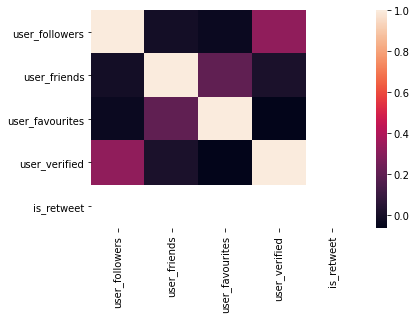

In [92]:
sns.heatmap(df.corr())

## Detailed Analysis

In [93]:
# Make a copy of dataframe before making any changes
tweets = df.copy()

In [94]:
# Convert date columns to datetime data type from object
tweets['date'] = pd.to_datetime(tweets['date'])
tweets['user_created'] = pd.to_datetime(tweets['user_created'])
tweets['date_ext'] = tweets['date'].dt.date


In [95]:
# Take care of nulls in location and description
tweets.user_location.fillna('Unknown', inplace=True)
tweets.user_description.fillna('Unknown', inplace=True)
tweets.source.fillna('Unknown', inplace=True)
tweets.hashtags.fillna('None', inplace=True)

In [96]:
# Verify
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166656 entries, 0 to 166655
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         166656 non-null  object        
 1   user_location     166656 non-null  object        
 2   user_description  166656 non-null  object        
 3   user_created      166656 non-null  datetime64[ns]
 4   user_followers    166656 non-null  int64         
 5   user_friends      166656 non-null  int64         
 6   user_favourites   166656 non-null  int64         
 7   user_verified     166656 non-null  bool          
 8   date              166656 non-null  datetime64[ns]
 9   text              166656 non-null  object        
 10  hashtags          166656 non-null  object        
 11  source            166656 non-null  object        
 12  is_retweet        166656 non-null  bool          
 13  date_ext          166656 non-null  object        
dtypes: b

In [97]:
# Attempt tp clean the location column. There are many other business rules that can be applied to 
# improve the accuracy of different cases. We can also use regular expressions

# If both country and city is mentioned

tweets["country"] = tweets.user_location.apply(lambda x: x.split(",")[-1].strip() \
                                            if ("," in x) else x)
tweets["city"] = tweets.user_location.apply(lambda x: x.split(",")[0].strip() \
                                            if ("," in x) else x)

# Replacing 2 digit US states with USA except UK
tweets["country"] = tweets.country.apply(lambda x: 'USA' if len(x.lower().strip())<3 and x!='uk' else x)

# Standarizing case senstive cases
tweets["country"] = tweets.country.apply(lambda x: 'USA' if x.lower().strip() in \
                                      ("united states, usa, us") else x)
tweets["country"] = tweets.country.apply(lambda x: 'India' if x.lower().strip() in \
                                      ("india") else x)

In [98]:
tweets["city"] = tweets.city.apply(lambda x: 'Unknown' if x.lower() in \
                                   ['india', 'united states', 'united kingdom', 'uk', 'usa', 'us'] \
                                   else x)

In [99]:
#tweets.country.value_counts().to_frame().style.bar()
#tweets.city.value_counts().to_frame().style.bar()

#### We see that US and India are the top countries from where most of the people have tweeted with USA being significantly higher. The top 5 cities with highest tweets are London, New Delhi, New York, Mumbai, Washington.

## Plot heatmap to see the geographical distribution based on number of tweets

In [100]:
# Taking top 100 countries and cities excluding the unknown at index 0
top100_count = tweets.country.value_counts(sort=True, ascending=False)[1:101]
top100_count = pd.DataFrame(top100_count)

top100_city= tweets.city.value_counts(sort=True, ascending=False)[1:101]
top100_city = pd.DataFrame(top100_city)

In [101]:
def get_coordinates(input_type, name, output_as='center'):
     # create url
    if input_type == "country":
        url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?country=',name,'&format=json&polygon=0')
    elif input_type == "city":
        url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?city=',name,'&format=json&polygon=0')
    response = requests.get(url)
    try:
        response = response.json()[0]
        # parse response to list
        if output_as == 'center':
            lst = [response.get(key) for key in ['lat','lon']]
            output = [float(i) for i in lst]
        if output_as == 'boundingbox':
            lst = response[output_as]
            output = [float(i) for i in lst]
        return output
    
    except (IndexError, ValueError):
        # this will log the whole traceback
        return [0,0]

In [102]:
# Get the latitudes and longitudes for the top 100 countries and cities
lat_long_count = [get_coordinates("country",coun) for coun in top100_count.index]
lat_long_city = [get_coordinates("city",city) for city in top100_city.index]

In [103]:
# Call the get_coodinates() and drop the duplicates from dataframe
def top100_df(input_type,df,lat_long):
    # merge lat and long with original dataframe
    for i, pair in zip(df.index, lat_long):
        df.loc[i,'lat'] = pair[0]
        df.loc[i,'long'] = pair[1] 
    # reset the index as country names
    df.reset_index(level=0, inplace=True)
    if input_type=="country":
        df.rename(columns={"country":"# of tweets","index":"country"}, inplace=True)
    elif input_type=="city":
        df.rename(columns={"city":"# of tweets","index":"city"}, inplace=True)
    # drop the countries/ cities with unidetified and duplicated latitudes and longitudes
    df.drop_duplicates(subset=['lat','long'],inplace=True)
    return df

In [104]:
# Call the top100_df() to finalize the country and city dataframes 
top100_count = top100_df("country",top100_count,lat_long_count)
top100_city = top100_df("city",top100_city,lat_long_city)

In [105]:
# Create a heatmap using folium
from folium import plugins
from folium.plugins import HeatMap
import branca.colormap

def color(magnitude):
    if magnitude>=2000:
        col='red'
    elif (magnitude>=500 and magnitude<2000):
        col='beige'
    elif magnitude<500:
        col='green'
    return col

def generateBaseMap(input_type,df,default_location=[40.693943, -73.985880], default_zoom_start=2):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    marker_cluster = plugins.MarkerCluster().add_to(base_map)
    
    HeatMap(data=df[['lat','long']].values.tolist(),radius=20,max_zoom=13).add_to(base_map)
    for lat,lan,tweet,name in zip(df['lat'],df['long'],df['# of tweets'],df.iloc[:,0]): 
        # Marker() takes location coordinates as a list as an argument 
        folium.Marker(location=[lat,lan],popup = [name,tweet], 
                      icon= folium.Icon(color=color(tweet), 
                      icon_color='white', icon='twitter', prefix='fa')).add_to(marker_cluster)
    #specify the min and max values of your data
    min, max = df['# of tweets'].min(), df['# of tweets'].max()
    colormap = cm.LinearColormap(colors=['green','beige','red'], vmin=min,vmax=max)
    if input_type=='country':
        colormap.caption = 'Country '+'distribution of COVID-19 tweets'
    elif input_type=='city':
         colormap.caption = 'City '+'distribution of COVID-19 tweets'
    colormap.add_to(base_map)
    return base_map

In [106]:
generateBaseMap('country',top100_count)

In [107]:
generateBaseMap('city',top100_city)

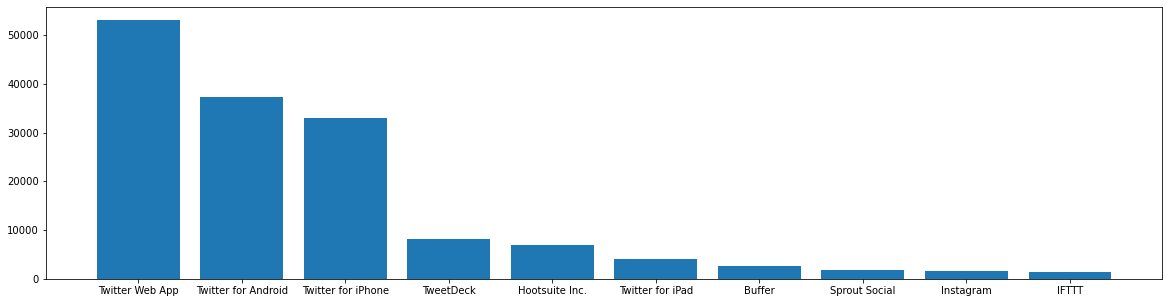

In [108]:
# Compare the tweet source
top10_source = tweets.source.value_counts().nlargest(10)
# initiate the figure with it's size
fig = plt.figure(figsize = (20,5))
plt.bar(top10_source.index, top10_source.values);

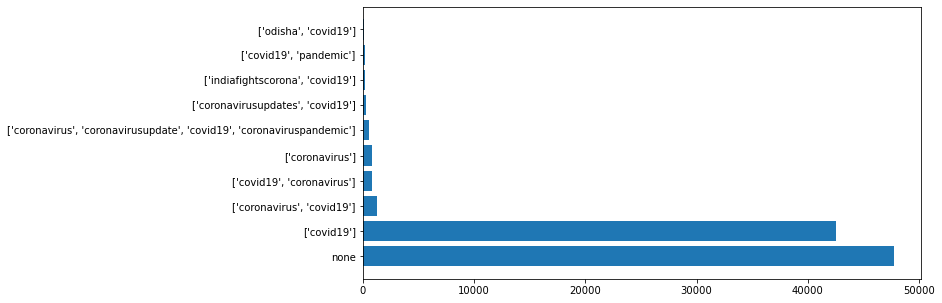

In [109]:
# Most trended hashtags
top10_hashtags = tweets.hashtags.str.lower().value_counts().nlargest(10)
# initiate the figure with it's size
fig = plt.figure(figsize = (10,5))
plt.barh(top10_hashtags.index, top10_hashtags.values);
#plt.xticks(rotation=90);

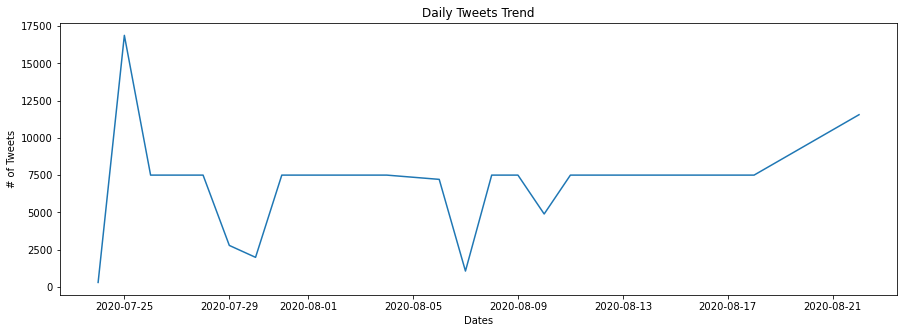

In [110]:
# Daily tweet trend
daily_tweets = tweets.groupby(['date_ext'])['text'].count()

fig = plt.figure(figsize = (15,5))
plt.plot(daily_tweets.index,daily_tweets.values)
plt.title('Daily Tweets Trend')
plt.xlabel('Dates')
plt.ylabel('# of Tweets')
plt.show()

In [ ]:
#unique_users = tweets.user_name.duplicated()

In [114]:
# Top 10 favoritized tweets
top10tweets = tweets.nlargest(10, ['user_favourites'])[['user_name','text','user_verified']]
top10tweets

,user_name,text,user_verified
14504,Chelsea Anderson.♥️,So Trump wants everyone else's child to get #COVID19 but his son Baron gets an exception now that's messed up!!! 😡😤 https://t.co/hq5eZGjGY2,False
148145,Patty,Herd immunity at 20% is still too high and would risk too many lives. A vaccine or therapeutics to lessen the sympt… https://t.co/01ThSD2khl,False
148540,Patty,"Sounds like the need for a booster shot, once a vaccine is made, for #COVID19 might be necessary based on this info… https://t.co/64hnbXS1mp",False
156746,paolo ignazio marong,Il rapporto tra casi accertati e mortalità è elevato #covid19 #Victoria #Australia Coronavirus updates LIVE: Victor… https://t.co/5Imw3WX6Rq,False
141621,paolo ignazio marong,"Focolai legati a chiese #CoreadelSud #Covid19 S. Korea adds 197 more cases of COVID-19; total at 15,515 https://t.co/t7NiULhjAu",False
141678,paolo ignazio marong,Mortalità molto elevata rispetto ai casi #covid19 Coronavirus updates LIVE: Victoria records 282 new COVID-19 cases… https://t.co/mIP4MZPkZw,False
133921,paolo ignazio marong,"Dati costanti #covid19 #HongKong third wave: latest infections linked to container port cluster, as city faces abou… https://t.co/SFnPgUTd72",False
112744,paolo ignazio marong,Continue oscillazioni attorno ai 30-50 casi al giorno #Covid19 New daily virus cases spike to over 50 on church-li… https://t.co/Y77SU3A3LZ,False
91661,paolo ignazio marong,E anche arrivando rapidamente il vaccino... #covid19 Covid-19: only half of Britons would definitely have vaccinati… https://t.co/0RtDrUYoqY,False
90134,paolo ignazio marong,Ancora lockdown mirati nel Regno Unito #Covid19 Coronavirus live news: UK recalls home tests over safety concerns a… https://t.co/Xq9zKq1HJ3,False


#### We notice that the top favoritized tweets are the ones showcasing concerns about COVID-19 and about the rising COVID-19 cases. Majority of these tweets have been by 'Paolo Ignazio Marong'. Surprisingly, both Patty and Paolo aren't verified users but their tweets have been favoritized the most.

In [125]:
# Top 10 followed twitter accounts
top10users = tweets.groupby(by=["user_name"])['user_followers'].max().sort_values(ascending=False)[:10]
top10users.to_frame().style.bar()

,user_followers
user_name,
CNN,49442559
CGTN,13892841
NDTV,13530302
The Times Of India,13037775
United Nations,12806543
China Xinhua News,12681192
CNN International,11081219
WIRED,10380131
ABP News,10321558


#### CNN, CGTN, and NDTV are the top 3 twitter accounts to be most followed with CNN leading the list having over 49m followers.

## Check sentiment of tweets
### Preprocessing text

In [128]:
# Normalize the text, convert everything other than a-z, A-Z, 0-9 to space
tweets['nor_text'] = tweets['text'].apply(lambda x: re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", x))

In [129]:
# Tokenize the normalized texts using TweetTokenizer which is specifically for tweets
tt = TweetTokenizer()
tweets['tokenized_text'] = tweets['nor_text'].apply(tt.tokenize)

In [ ]:
# Remove stopwords
tweets['stopwords_text'] = tweets['tokenized_text'].\
    apply(lambda x: [item for item in x if item not in stopwords.words("english")])

In [ ]:
# Identify the part of speech for all the tweets
# tweets['pos_text'] = tweets['stopwords_text'].apply(pos_tag)
# tweets['ne_text'] = tweets['pos_text'].apply(ne_chunk)
# tweets['stem_text'] = tweets['stopwords_text'].apply(lambda x: [PorterStemmer().stem(w) for w in x])

In [ ]:
# Lemmatize the tweets to get to their root words
tweets['lemm_text'] = tweets['stopwords_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(w) \
                                                                for w in x])

### Create WordCloud

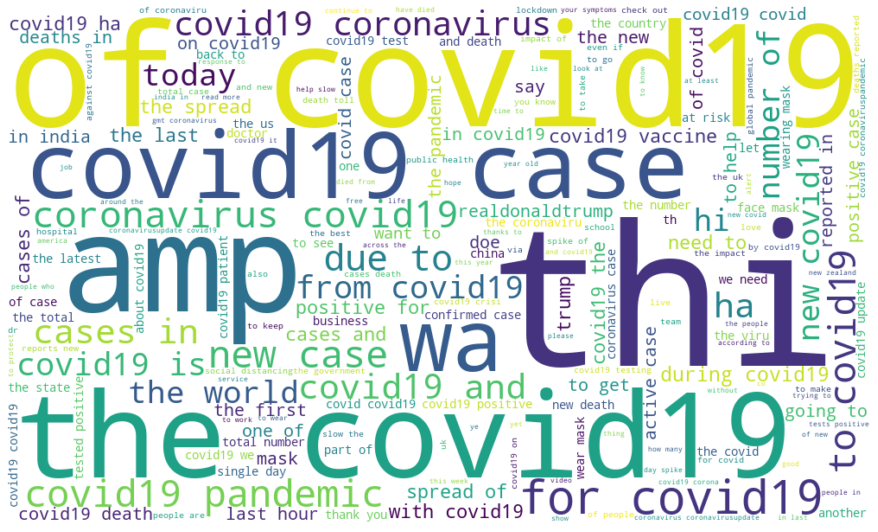

In [131]:
# Create a wordcloud for most popular words in tweets

text = '' 
stop_words = set(stopwords.words("english"))
for row in tweets['nor_text']:
    # typecaste each row to string and split it to get tokens
    tokens = str(row).split()
    #row = row.replace("'", "")
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
    text += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 600, 
                      #colormap = 'Paired'
                      background_color ='white', 
                      stopwords=stop_words).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.title("Most commonly used words in the tweets", fontsize=20, color='Black')
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### As expected, the most common words that pop up are COVID19, coronavirus, pandemic, vaccine etc.

### Calculate Sentiments

In [260]:
sample=tweets["nor_text"].head(10)
sample = sample.to_frame()

In [278]:
# We are using Compound score to detect the tweet sentiment which is a metric that calculates the sum of
# all the lexicon ratings which have been normalized between 
# -1(most extreme negative) and +1 (most extreme positive)
# positive: (compound score >= 0.05), negative : (compound score <= -0.05), neutral otherwise
sid = SentimentIntensityAnalyzer()
for index, row in tqdm(tweets.iterrows()): #tqdm 
    ss = sid.polarity_scores(row['nor_text'])
    if ss['compound'] >= 0.05 : 
        tweets.at[index,'sentiment'] = "Positive"
  
    elif ss['compound'] <= - 0.05 : 
        tweets.at[index,'sentiment'] = "Negative"
  
    else : 
        tweets.at[index,'sentiment'] = "Neutral"

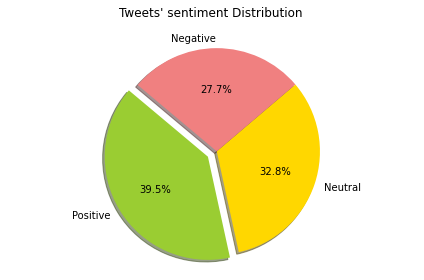

In [319]:
# Show distribution of tweet sentiments (pie?) and wordcloud of each
#sentiment_dist = tweets.groupby(by=['sentiment'])['sentiment'].count()
# Plot sentiment distribution
sentiment_dist = tweets.sentiment.value_counts()

plt.pie(sentiment_dist, labels=sentiment_dist.index, explode= (0.1,0,0),
        colors=['yellowgreen', 'gold', 'lightcoral'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Tweets\' Sentiment Distribution \n")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Sentiment of top 10 tweets identified before

In [ ]:
# Filter a few entities using ne?

In [ ]:
"""A retweet is when someone shares someone else’s tweet. It is similar to sharing in Facebook. Sometimes you may want to remove retweets as they contain duplicate content that might skew your analysis if you are only looking at word frequency"""

In [ ]:
# check size of notebook
!ls -lh

"""! jupyter trust __notebook_source__.ipynb
my_submission = pd.DataFrame({'Id': test.Id, 'col2': col2})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)"""

## References
- https://stackoverflow.com/questions/44173624/how-to-apply-nltk-word-tokenize-library-on-a-pandas-dataf**rame-for-twitter-data
- https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html#text
- https://zapcircle.net/geomapping-with-python/
- https://matplotlib.org/basemap/users/geography.html
- https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
- https://colab.research.google.com/drive/1HJB7UGj7YuUEJi-cKZRAr3O4Dlym2KrP#scrollTo=0H-uRYF1iIjS
- https://stackoverflow.com/questions/56876620/unsure-how-to-use-colormap-with-folium-marker-plot
- https://www.geeksforgeeks.org/generating-word-cloud-python/
- https://www.nltk.org/howto/sentiment.html
- https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
    